# Задание №1. Поиск 5 наиболее распространённых паттернов

In [ ]:
# Хотелось бы отметить, что данное задание было одновременно и интересным, и сложным. 
# В ходе его выполнения пришлось прибегнуть к интернету для поиска новой информации (новых функций, модулей),
# поэтому в выполнении использовался модуль, не упоминавшийся в курсе. 

In [137]:
# Для начала импортируем библиотеки 

import pandas as pd
from itertools import combinations # в ходе выполнения проекта познакомилась с новым модулем :) 

In [138]:
products = pd.read_csv('https://stepik.org/media/attachments/lesson/409319/test1_completed.csv')

In [3]:
products.head(10)

,id,Товар,Количество
0,17119,Лимон,1.10
1,17119,Лимон оранжевый,0.70
2,17119,Лук-порей,10.00
3,17119,Лук репчатый,2.50
4,17119,Малина свежая,1.00
5,17119,Морковь немытая,1.40
6,17119,Черешня сушеная,1.80
7,17530,Лимон оранжевый,0.25
8,17530,Изюм Султана,0.50
9,17530,Капуста цветная,2.00


In [4]:
# Смотрим, какие типы данных в таблице

products.dtypes

id              int64
Товар          object
Количество    float64
dtype: object

In [5]:
# Проверяем, есть ли пропущенные значения 

products.isna().sum()

id            0
Товар         0
Количество    0
dtype: int64

In [34]:
products = products.rename(columns={'Товар': 'goods', 'Количество': 'amount'})

In [35]:
# Для "вычления" пар продуктов используем функцию
# itertools.combinations(iterable, [r]) - комбинации длиной r из iterable без повторяющихся элементов.

pairs = []

for i in products.id.unique():
    goods = products[products.id == i]['goods'].to_list()
    goods.sort()
    
    for j in list (combinations(goods,2)):
        pairs.append(j) 
  

In [36]:
# Создаем новый датасет из получившихся значений, 

pairs = pd.DataFrame(pairs, columns=['good1', 'good2'])

top = pairs.value_counts() \
    .to_frame() \
    .reset_index() \
    .head()

In [37]:
# выводим ТОП-5 

top

,good1,good2,0
0,Огурцы Луховицкие,Укроп,431
1,Петрушка,Укроп,408
2,Арбуз,Огурцы Луховицкие,345
3,Кабачки,Огурцы Луховицкие,326
4,Кинза,Укроп,303


# Задание №2. Прогноз

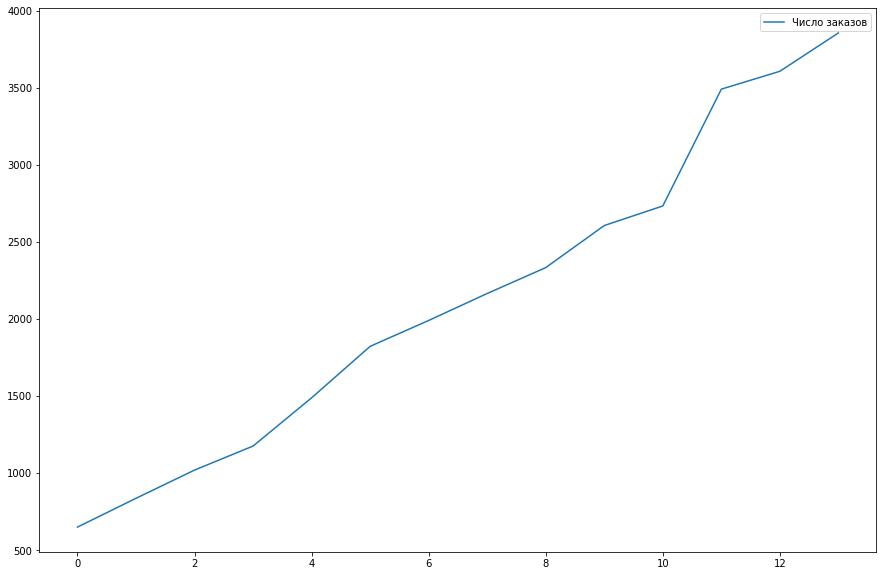

In [342]:
# Смотрим исходные данные, видим, что есть зависимость

sales = pd.read_csv('https://stepik.org/media/attachments/lesson/426638/test2_completed.csv')

sales.plot(figsize=(15, 10))

In [343]:
# Предобработка данных 

sales = sales.rename(columns={'Дата': 'date', 'Число заказов' : 'amount'})

In [344]:
sales.dtypes

date      object
amount     int64
dtype: object

In [345]:
# Импортируем недостающие библиотеки 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [346]:
sales

,date,amount
0,2020-01-05,650
1,2020-01-12,837
2,2020-01-19,1020
3,2020-01-26,1176
4,2020-02-02,1489
5,2020-02-09,1823
6,2020-02-16,1991
7,2020-02-23,2166
8,2020-03-01,2334
9,2020-03-08,2607


In [347]:
# В неделю с 2020-02-02 по 2020-02-09 была проведена массивная акция, повысившая число заказов на 7% - "убираем" акцию, 
# чтобы данные были корректны 

sales.loc[sales['date'] == '2020-02-02', 'amount'] = sales.loc[sales['date'] == '2020-02-02', 'amount'] / 1.07

sales.loc[sales['date'] == '2020-02-09', 'amount'] = sales.loc[sales['date'] == '2020-02-09', 'amount'] / 1.07

In [348]:
sales['date'] = pd.to_datetime(sales['date'])

In [349]:
# Выделяем в отдельную колонку номер недели 

sales['week'] = np.arange(len(sales)) + 1

In [350]:
# Задаем переменные для построения регрессионной модели 

x = np.array(sales['week']).reshape((-1, 1))

y = np.array(sales['amount'])

In [351]:
model = LinearRegression().fit(x, y)

model

LinearRegression()

In [368]:
print(model.intercept_) 

print(model.coef_) 

241.5864229228714
[249.3820684]


In [353]:
future = pd.date_range('2020-04-12', '2020-07-12', freq = 'W')

In [369]:
future

DatetimeIndex(['2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03',
               '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28',
               '2020-07-05', '2020-07-12'],
              dtype='datetime64[ns]', freq='W-SUN')

In [355]:
a = 14

for i in range(len(future)):
    sales.loc[a] = future[i]
    sales['date'].loc[a] = future[i]
    sales['amount'].loc[a] = 0
    sales['week'].loc[a] = a+1
    a = a + 1 
    
sales = sales.drop(columns=['amount'])    

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [356]:
# Рассчитываем с применением регрессионной модели
x1 = np.array(sales['week']).reshape((-1, 1))

y1 = model.predict(x1).round(0).astype(int)

print(y1)

[ 491  740  990 1239 1488 1738 1987 2237 2486 2735 2985 3234 3484 3733
 3982 4232 4481 4730 4980 5229 5479 5728 5977 6227 6476 6726 6975 7224]


In [359]:
sales['amount'] = y1

sales.head()

,date,week,amount
0,2020-01-05,1,491
1,2020-01-12,2,740
2,2020-01-19,3,990
3,2020-01-26,4,1239
4,2020-02-02,5,1488


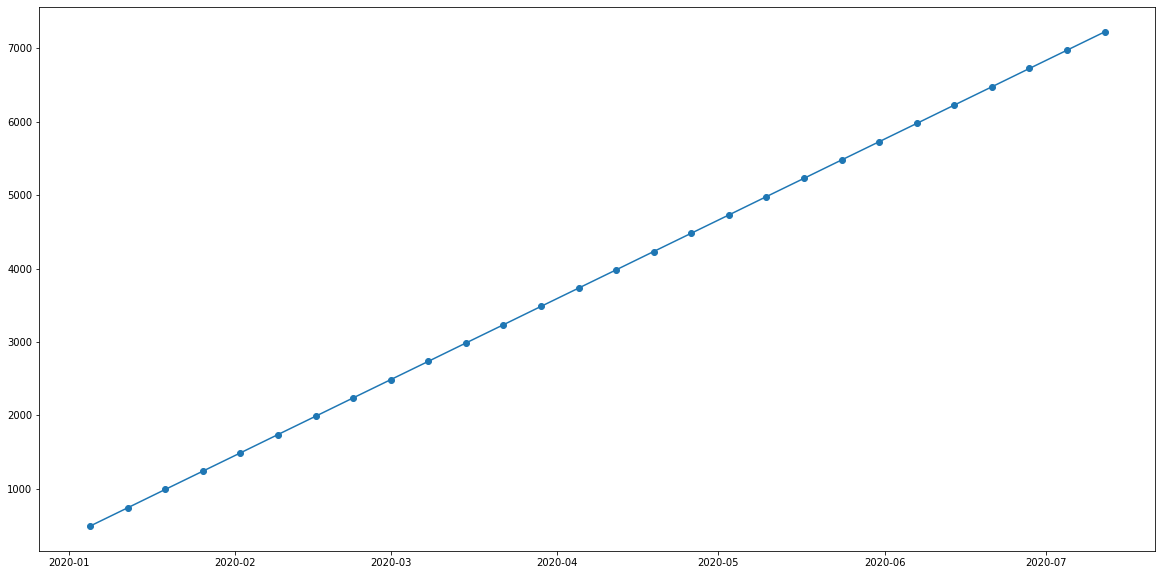

In [367]:
plt.figure(figsize=(20, 10))

plt.scatter(sales['date'], sales['amount'])

plt.plot(sales['date'], sales['amount'])

plt.show()

In [ ]:
# Комментарии:
# 1. Для выполнения данного задания я использовала линейную регрссию (статья 'Линейная регрессия в Python' В. Костерина).
# link = https://chel-center.ru/python-yfc/2020/12/20/linejnaya-regressiya-v-python/

# 2. На мой взгляд, для качественного прогнозирования мало исходных данных. Нет возможности поймать сезонность. 

# 3. Самое challenging задание для меня оказалось =)) 

# Задание №3. Таблица

In [372]:
# Импортируем недостающие библиотеки

import pandahouse as ph

In [373]:
# Подключаем нашу базу

connection_1 = {'host': 'https://clickhouse.lab.karpov.courses',
                'database': 'default',
                'user': 'student',
                'password': 'dpo_python_2020'}

In [377]:
# В данном варианте решила использовать IF вместо CASE + оконную функцию

query = ''' 

SELECT
        purchase_date,
        purchase_id,
        client_id,
        client_age, 
        client_registration_age,
        promotion_name,
        category_name,
        partner_name,
        client_city, 
        city,
        revenue,
        quantity,
        IF(purchase_amount=1, 'new', 'loyal') AS client_category
FROM
        (SELECT
            toFloat64(purchase.price*purchase.quantity) AS revenue,
            toInt64(purchase.quantity) as quantity,
            purchase.purchase_date AS purchase_date ,
            purchase.purchase_id AS purchase_id ,
            purchase.client_id AS client_id ,
            promotion.category_name AS category_name,
            promotion.promotion_name AS promotion_name ,
            promotion.partner_name AS partner_name,
            client_city, 
            city,
            dateDiff('year', client.birth_date, toDate(now( ))) AS client_age, 
            dateDiff('year', client.registration, toDate(now( ))) AS client_registration_age,
            row_number(purchase_date) over w as purchase_amount
          
    FROM 
       project_variant_2.purchase purchase
       
    INNER JOIN 
       project_variant_2.promotion promotion
       
    ON purchase.promotion_id = promotion.promotion_id
    
    INNER JOIN 
        project_variant_2.client AS client 
        
    ON client.client_id = purchase.client_id  
        
    INNER JOIN 
    
        (SELECT DISTINCT 
                    city_id,
                    city   
                
        FROM 
                project_variant_2.city) 
                                     a
    ON purchase.city_id = a.city_id   
        
    INNER JOIN
    
        (SELECT DISTINCT 
                client_city_id, 
                client_city     
        FROM 
                project_variant_2.city) 
        
                                     cc
    ON client.client_city_id = cc.client_city_id
                          
    WHERE purchase.status= 1 AND purchase.purchase_date BETWEEN '2020-05-01' AND '2020-08-01' 
    
    WINDOW w AS (partition by client_id order by purchase_date) )  
    
'''

In [378]:
task3 = ph.read_clickhouse(connection=connection_1, query=query)

In [365]:
task3.head()

,purchase_date,purchase_id,client_id,client_age,client_registration_age,promotion_name,category_name,partner_name,client_city,city,revenue,quantity,client_category
0,2020-07-20,3002,1,26,1,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Вена,Новгород,660.0,3,new
1,2020-07-24,3626,1,26,1,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Вена,Ярославль,2280.0,8,loyal
2,2020-07-26,918,1,26,1,campaign_4,Прочее,KarpovCourses,Вена,Минск,615.0,3,loyal
3,2020-05-15,7362,2,23,3,campaign_1,Бакалея,Google,Щучинщина,Вена,180.0,9,new
4,2020-05-21,6702,2,23,3,campaign_4,Прочее,KarpovCourses,Щучинщина,Минск,465.0,3,loyal


In [ ]:
# Комментарии:
# Достаточно интересное задание, пришлось вспомнить и погуглить многие функции =)) 